In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

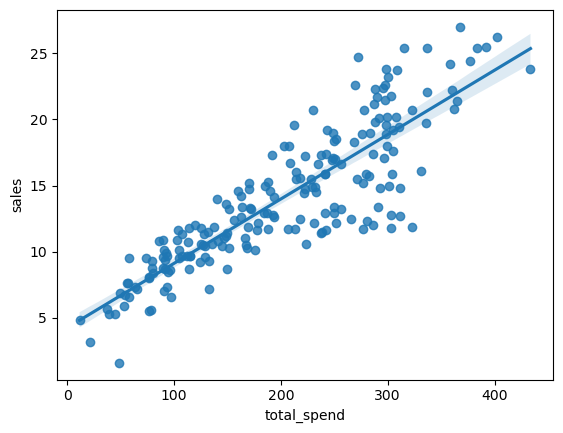

In [4]:
sns.regplot(data=df,x='total_spend',y='sales')

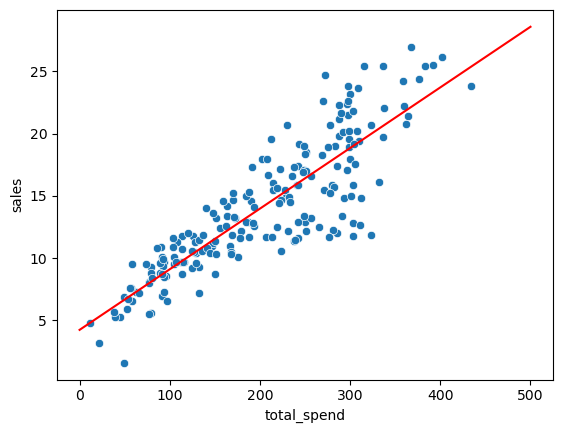

In [5]:
X = df['total_spend']
y = df['sales']

poly = np.polyfit(x=X,y=y,deg=1)
# y = mx+b
# y = B1x + B0
# polyfit returns the B coeff for X and Y
potential_spend = np.linspace(0,500,100)
predicted_sales = poly[0]*potential_spend + poly[1]

sns.scatterplot(data=df, x='total_spend', y='sales')

plt.plot(potential_spend,predicted_sales, color='red')


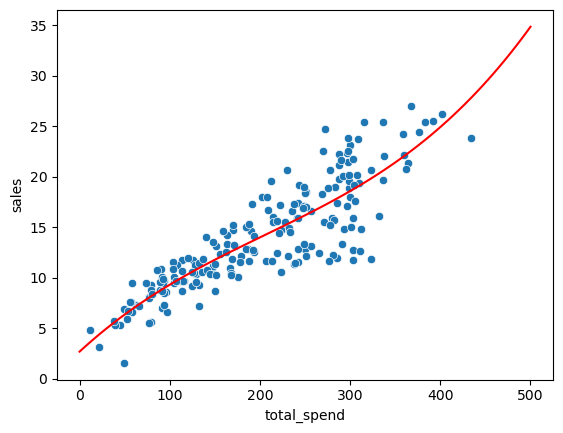

In [6]:
poly = np.polyfit(x=X,y=y,deg=3)

potential_spend = np.linspace(0,500,100)
predicted_sales = poly[0]*(potential_spend**3) + poly[1]*(potential_spend**2) + poly[2]*potential_spend + poly[3]

sns.scatterplot(data=df, x='total_spend', y='sales')

plt.plot(potential_spend,predicted_sales, color='red')

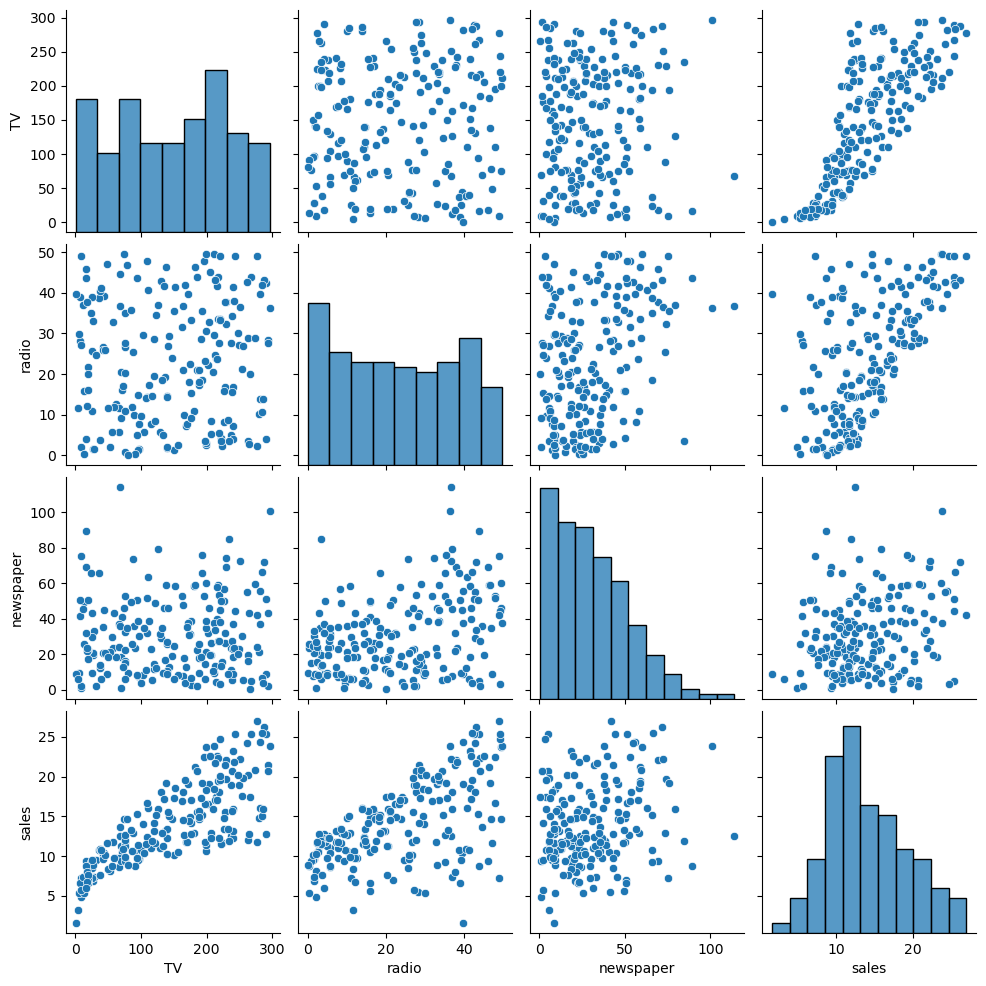

In [8]:
df = pd.read_csv('Advertising.csv')

sns.pairplot(df)

In [10]:
X = df.drop('sales', axis=1)
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2
